In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from kmeans_Anchors import *

In [2]:
#df = create_label_datframe(path_to_labels="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\label_2")
#display_bounding_boxes(df,path_to_images="/home/marcelo/Documents/Yolov3/data/training/image_2//",path_to_labels="/home/marcelo/Documents/Yolov3/data/training/label_2/")
df = create_label_datframe()

In [3]:
df

,image,type,x_min,y_min,x_max,y_max,height,width
0,002993,Vehicle,619.65,101.71,774.09,216.33,114.62,154.44
1,002993,Vehicle,405.04,157.48,471.43,212.51,55.03,66.39
2,002993,Vehicle,443.41,156.39,489.75,189.73,33.34,46.34
3,002993,Vehicle,496.65,148.09,526.60,165.71,17.62,29.95
4,002993,Vehicle,852.12,69.26,1216.84,232.76,163.50,364.72
...,...,...,...,...,...,...,...,...
51860,001349,Vehicle,640.28,167.75,705.80,198.01,30.26,65.52
51861,001349,Vehicle,438.00,176.58,475.13,200.55,23.97,37.13
51862,001349,Vehicle,459.80,178.11,490.07,198.71,20.60,30.27
51863,001349,Vehicle,416.55,178.75,440.33,196.68,17.93,23.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51865 entries, 0 to 51864
Data columns (total 8 columns):
image     51865 non-null object
type      51865 non-null object
x_min     51865 non-null float64
y_min     51865 non-null float64
x_max     51865 non-null float64
y_max     51865 non-null float64
height    51865 non-null float64
width     51865 non-null float64
dtypes: float64(6), object(2)
memory usage: 3.2+ MB


path to the image /home/mlrig/Documents/Yolo3 Implementation/data/training/image_2//000134.png


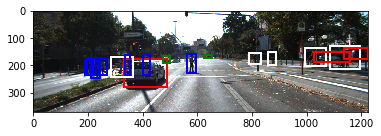

In [5]:
#display_bounding_boxes(df,path_to_labels="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\label_2",path_to_images="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\image_2")
#display_bounding_boxes(df,path_to_labels="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\label_2",path_to_images="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\image_2")
display_bounding_boxes(df)

In [6]:

data = np.column_stack((df["width"].astype(float),df["height"].astype(float),np.zeros((df.shape[0],1))))

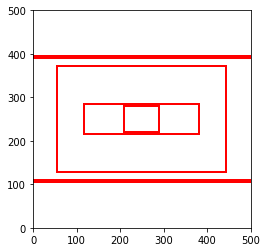

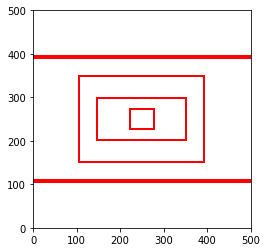

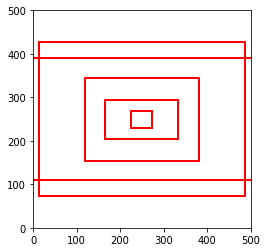

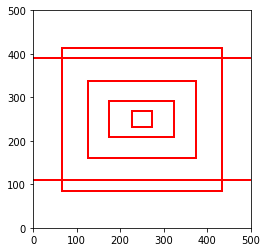

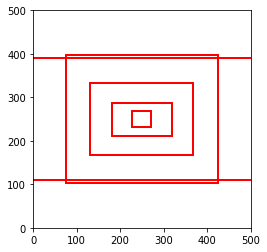

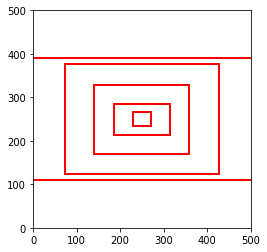

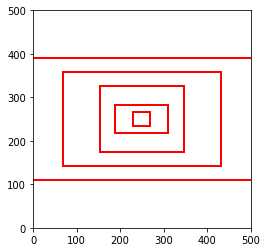

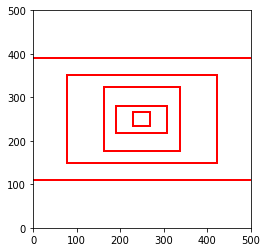

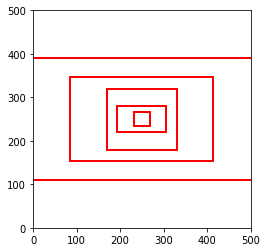

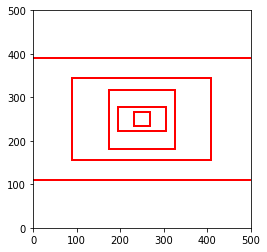

In [7]:
from kmeans_Anchors import *
anchors = kmeans_anchors(data,iterations=10,num_anchors=5)
#display_bounding_boxes_with_anchors(df,anchors,path_to_labels="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\label_2",path_to_images="C:\\Users\\M.SANCHEZORTEGA\\Documents\\Python Scripts\\Yolov3-master\\data\\training\\image_2")

path to the image /home/mlrig/Documents/Yolo3 Implementation/data/training/image_2//005283.png
151
151
151
151


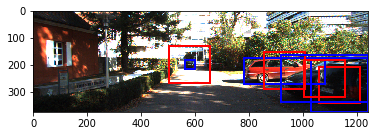

In [37]:
display_bounding_boxes_with_anchors(df,anchors)

In [13]:
IoU_fixed(data[0][0],data[0][1],anchors[2][0],anchors[2][1])

0.05327264158608924

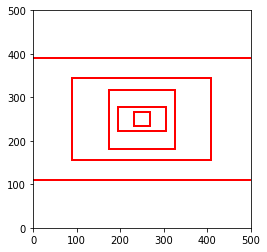

In [10]:
display_anchors(anchors)